In [135]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [215]:
make_dir(train_main_dir)

# Data

In [216]:
train_main_dir = '/Users/akash/Downloads/all/train1'
test_main_dir = '/Users/akash/Downloads/all/test1'
valid_main_dir = '/Users/akash/Downloads/all/valid'

dogs_train_main_dir = os.path.join(train_main_dir , 'dogs')
cats_train_main_dir = os.path.join(train_main_dir , 'cats')

dogs_test_main_dir = os.path.join(test_main_dir , 'dogs')
cats_test_main_dir = os.path.join(test_main_dir , 'cats')

dogs_valid_main_dir = os.path.join(valid_main_dir , 'dogs')
cats_valid_main_dir = os.path.join(valid_main_dir , 'cats')




In [217]:
def make_dir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        
def get_files_path(from_number , to_number):
    train_main_dir = '/Users/akash/Downloads/all/train'
    cat_names = ['cat.{}.jpg'.format(i) for i in range(from_number ,to_number)]
    dog_names = ['dog.{}.jpg'.format(i) for i in range(from_number ,to_number)]
    cat_paths = [os.path.join(train_main_dir , i) for i in cat_names]
    dog_paths = [os.path.join(train_main_dir , i) for i in dog_names]

    return cat_paths , dog_paths

def copy_to(files , dest_path):
    try :
        make_dir(dest_path)
    except:
        raise OSError
    for name in files:
        try:
            file_name = name.split('/')[-1]
            dest_file_name= os.path.join(dest_path , file_name)
            shutil.copy(name , dest_file_name)
        except:
            continue
        
    return True

In [218]:

cat_train_paths ,dog_train_paths  = get_files_path(0,1000)
cat_test_paths ,dog_test_paths  = get_files_path(1000,1500)
cat_valid_paths , dog_valid_paths = get_files_path(1500,2000)

In [219]:
copy_to(dog_train_paths ,dogs_train_main_dir )
copy_to(cat_train_paths ,cats_train_main_dir )
copy_to(dog_test_paths ,dogs_test_main_dir )
copy_to(cat_test_paths ,cats_test_main_dir )
copy_to(dog_valid_paths ,dogs_valid_main_dir )
copy_to(cat_valid_paths ,cats_valid_main_dir )

True

In [141]:
for d in [dogs_train_main_dir ,cats_train_main_dir ,dogs_test_main_dir ,cats_test_main_dir ,dogs_valid_main_dir ,cats_valid_main_dir]:
    print(len(os.listdir(d)))

1000
1000
500
500
500
500


# PreProcessing

In [222]:
#!pydoc keras.preprocessing.image
ImageDataGenerator.flow_from_directory?

In [225]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [234]:
train_data_gen = train_data_gen.flow_from_directory(directory = train_main_dir ,
                                       target_size = (150 , 150 ) , 
                                       batch_size = 16 , 
                                       class_mode = 'binary' )


test_data_gen = test_data_gen.flow_from_directory(directory = test_main_dir ,
                                       target_size = (150 , 150 ) , 
                                       batch_size = 16 , 
                                       class_mode = 'binary' )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Model

In [93]:
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model

In [97]:
model = models.Sequential()

In [98]:
model.add(layers.Conv2D(32 , (3,3), activation= 'relu' , input_shape = (150,150,3)))

In [99]:
model.add(layers.MaxPooling2D((2,2)))

In [100]:
model.add(layers.Conv2D(64 , (3,3), activation= 'relu' , input_shape = (150,150,3)))

In [101]:
model.add(layers.MaxPooling2D((2,2)))

In [102]:
model.add(layers.Conv2D(128 , (3,3), activation= 'relu' , input_shape = (150,150,3)))

In [103]:
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3), activation= 'relu' , input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))


In [104]:
model.add(layers.Flatten())
model.add(layers.Dense(512 , activation='relu'))
model.add(layers.Dense(1 , activation='softmax'))

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [230]:
model.compile(loss='binary_crossentropy' , optimizer=optimizers.RMSprop(lr=0.01) , metrics=['acc'])

In [89]:
model.save('/Users/akash/Downloads/all/catsvsdogsv1.json')

In [95]:
model2 = load_model('/Users/akash/Downloads/all/catsvsdogsv1.json')

In [96]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [237]:
 history = model.fit_generator(train_data_gen , steps_per_epoch= 2 , epochs = 5 , validation_data= test_data_gen , validation_steps= 2)

Epoch 1/5
2/2 [==============================] - 4s 2s/step - loss: 5.4802 - acc: 0.6562 - val_loss: 5.4802 - val_acc: 0.6562
Epoch 2/5
2/2 [==============================] - 3s 2s/step - loss: 6.4766 - acc: 0.5938 - val_loss: 5.9784 - val_acc: 0.6250
Epoch 3/5
2/2 [==============================] - 3s 1s/step - loss: 9.4658 - acc: 0.4062 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/5
2/2 [==============================] - 3s 1s/step - loss: 5.9784 - acc: 0.6250 - val_loss: 9.9640 - val_acc: 0.3750
Epoch 5/5
2/2 [==============================] - 3s 2s/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.4730 - val_acc: 0.5312


In [238]:
model.save('/Users/akash/Downloads/all/catsvsdogs_1.h5')

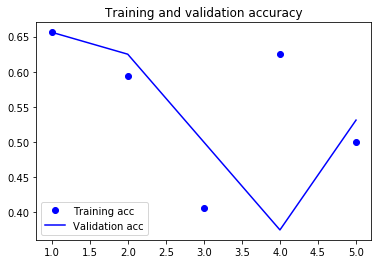

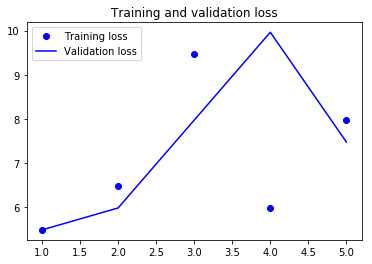

In [239]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [240]:
from keras.applications import VGG16

In [242]:
conv_base = VGG16(weights = 'imagenet' , include_top=False , input_shape= (150 , 150 , 3))

58892288/58889256 [==============================] - 40s 1us/step


In [244]:
model = models.Sequential()

In [245]:
model.add(conv_base)

In [ ]:
model.add(layers.Flatten())

In [279]:
def extract_features(directory , sample_count):
    features = np.zeros(shape = (sample_count , 4,4,512))
    labels = np.zeros(shape= (sample_count))
    batchSize = 32
    gen = ImageDataGenerator(rescale=1./255)
    gen = gen.flow_from_directory(directory , target_size = (150,150) , batch_size = batchSize , class_mode = 'binary')
    i = 0
    for inputs_batch , labels_batch in gen:
        features_batch = conv_base.predict(inputs_batch)
        print(features_batch.shape)
        features[i*batchSize : (i+1)* batchSize ,:,:,:] = features_batch
        labels[i*batchSize : (i+1)* batchSize] = labels_batch
        i+=1
        if i*batchSize >= sample_count:
            break
    return features , labels

In [280]:
train_features , train_labels = extract_features(train_main_dir , 64)

Found 2000 images belonging to 2 classes.
(32, 4, 4, 512)
(32, 4, 4, 512)


In [283]:
test_features , test_labels = extract_features(test_main_dir , 64)

Found 1000 images belonging to 2 classes.
(32, 4, 4, 512)
(32, 4, 4, 512)


In [284]:
valid_features , valid_labels = extract_features(valid_main_dir , 64)

Found 1000 images belonging to 2 classes.
(32, 4, 4, 512)
(32, 4, 4, 512)


In [291]:
train_features = np.reshape(train_features , (64 ,-1))
test_features = np.reshape(test_features , (64 ,-1))
valid_features = np.reshape(valid_features , (64 ,-1))

In [296]:
train_features.shape

(64, 8192)

In [396]:
model = models.Sequential()

In [397]:
model.add(layers.Dense(512 , activation='relu' , input_shape = (8192,) , name = 'dense1' ))

In [398]:
model.add(layers.Dropout(0.5 , name = 'dropout1'))
model.add(layers.Dense(1 ,activation='sigmoid'  , name = 'dense2'))

In [399]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 512)               4194816   
_________________________________________________________________
dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
dense2 (Dense)               (None, 1)                 513       
Total params: 4,195,329
Trainable params: 4,195,329
Non-trainable params: 0
_________________________________________________________________


In [400]:
model.compile(loss='binary_crossentropy' , optimizer= optimizers.RMSprop(lr=2e-5) , metrics=['acc'])

In [401]:
history = model.fit(train_features , train_labels , batch_size=16 , epochs=20 , validation_data=(valid_features ,valid_labels ))

Train on 64 samples, validate on 64 samples
Epoch 1/20
64/64 [==============================] - 1s 21ms/step - loss: 0.8406 - acc: 0.4844 - val_loss: 0.6719 - val_acc: 0.5312
Epoch 2/20
64/64 [==============================] - 0s 6ms/step - loss: 0.6701 - acc: 0.5625 - val_loss: 0.6601 - val_acc: 0.6094
Epoch 3/20
64/64 [==============================] - 0s 5ms/step - loss: 0.6169 - acc: 0.6406 - val_loss: 0.6096 - val_acc: 0.6719
Epoch 4/20
64/64 [==============================] - 0s 5ms/step - loss: 0.5520 - acc: 0.7188 - val_loss: 0.5957 - val_acc: 0.6719
Epoch 5/20
64/64 [==============================] - 0s 5ms/step - loss: 0.5734 - acc: 0.7344 - val_loss: 0.5912 - val_acc: 0.7031
Epoch 6/20
64/64 [==============================] - 0s 5ms/step - loss: 0.5029 - acc: 0.7969 - val_loss: 0.5680 - val_acc: 0.7656
Epoch 7/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4326 - acc: 0.8125 - val_loss: 0.5674 - val_acc: 0.7344
Epoch 8/20
64/64 [===========================

In [402]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [403]:
import matplotlib.pyplot as plt

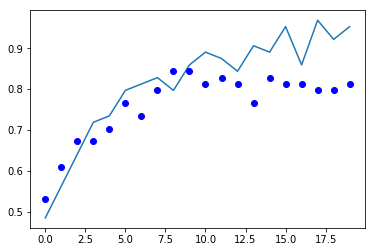

In [404]:
epochs = range(0,len(acc))
plt.plot(epochs , acc, )
plt.plot(epochs , val_acc , 'bo')

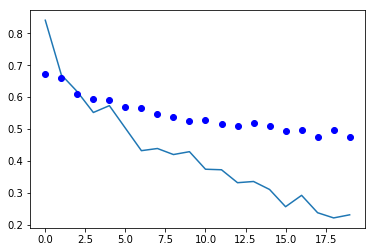

In [405]:
plt.plot(epochs , loss, )
plt.plot(epochs , val_loss , 'bo')